Initial Data:
   Size  Location  Number of Rooms   Price
0  1200     urban                3  250000
1  1500  suburban                4  300000
2   900     rural                2  150000
3  1800     urban                5  400000
4  1100  suburban                3  230000

Missing Values:
 Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


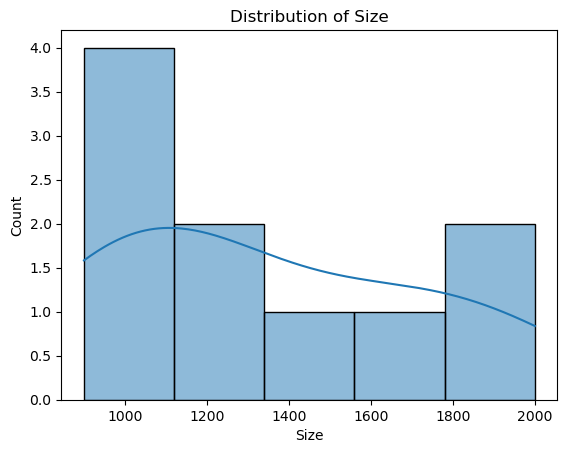

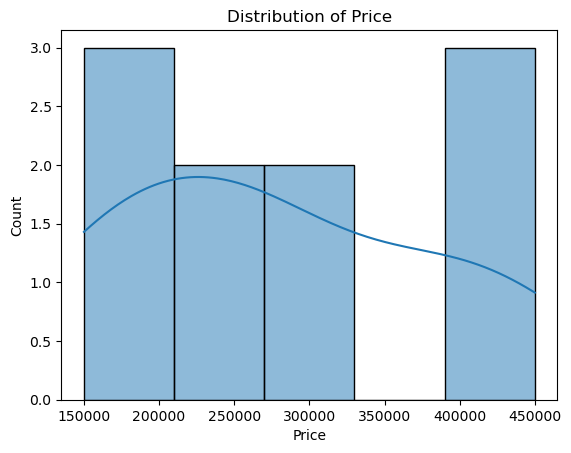


Correlation Matrix:
                     Size  Number of Rooms     Price
Size             1.000000         0.908166  0.993218
Number of Rooms  0.908166         1.000000  0.909891
Price            0.993218         0.909891  1.000000

Model Evaluation:
RMSE: 20663.13
R² Score: 0.79

Predicted vs Actual:
    Actual      Predicted
8  390000  374869.565217
1  300000  325000.000000


C:\Users\harsh\AppData\Local\Temp\ipykernel_5604\3020466983.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("house_prices.csv")
print("Initial Data:")
print(df.head())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill or drop missing values
df = df.dropna()

# Explore distributions
sns.histplot(df['Size'], kde=True)
plt.title("Distribution of Size")
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Price")
plt.show()

# Check correlation
print("\nCorrelation Matrix:")
print(df.corr())

# Define features and target
X = df[['Size', 'Location', 'Number of Rooms']]
y = df['Price']

# Preprocessing: scale numeric and encode categorical
numeric_features = ['Size', 'Number of Rooms']
categorical_features = ['Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# Compare predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredicted vs Actual:\n", results.head())

# Feature insights not directly available from pipeline (due to transformation),
# but feature importances can be manually explored if needed.